In [6]:
# importing packages and data

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

df = pd.read_csv("extended_features.csv")

# fill missed funding periods with 0
df["funding"] = df["funding"].fillna(0)

df = df[df.groupby('asset').cumcount() > 55].copy() # can use earlier data here but for fairness of comparison i wont
df = df.groupby('asset').head(-1).copy()

In [7]:
# creating funding signal
df["funding_sig"] = np.log(df["funding"]+1)

In [8]:
# create funding deciles
df['funding_decile'] = df.groupby('timestamp')['funding_sig'] \
        .transform(lambda x: pd.qcut(x.rank(method='first'), 10, labels=False))

# check df
unique_times = df["timestamp"].unique()
#print(unique_times)
print(df[df["timestamp"] == unique_times[0]])

                 timestamp         asset           open           high  \
56     2025-01-31 20:00:00  1000BONK-USD       0.024936       0.025613   
472    2025-01-31 20:00:00  1000PEPE-USD       0.014007       0.014258   
762    2025-01-31 20:00:00  1000SHIB-USD       0.018872       0.019227   
1411   2025-01-31 20:00:00       ADA-USD       0.945700       0.954300   
1852   2025-01-31 20:00:00       ARB-USD       0.649000       0.651800   
2271   2025-01-31 20:00:00      AVAX-USD      34.720000      35.070000   
2909   2025-01-31 20:00:00       BNB-USD     679.200000     681.400000   
3332   2025-01-31 20:00:00       BTC-USD  102375.600000  102753.100000   
3780   2025-01-31 20:00:00      DOGE-USD       0.327960       0.330150   
4475   2025-01-31 20:00:00       ETH-USD    3339.420000    3341.010000   
5021   2025-01-31 20:00:00      GOAT-USD       0.203700       0.207700   
6751   2025-01-31 20:00:00      LINK-USD      24.897000      25.905000   
7157   2025-01-31 20:00:00       LTC-U

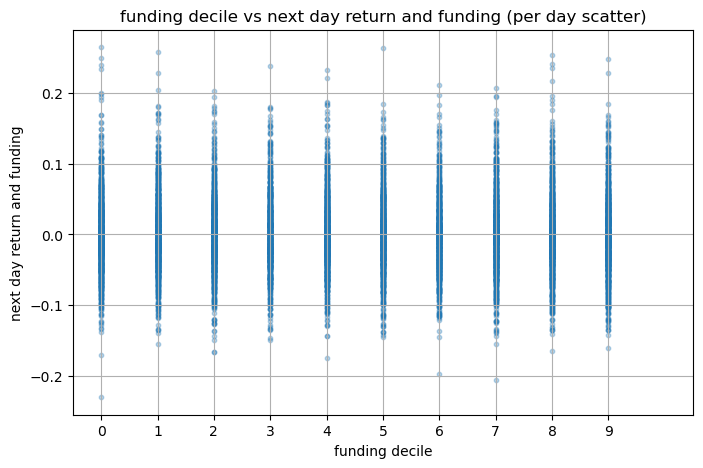

In [9]:
# scatter plot to gain initial intuiton

plt.figure(figsize=(8,5))
plt.scatter(
    df["funding_decile"], 
    df["next_returns_funding_volscaled"], 
    alpha=0.3, 
    s=10
)

plt.xlabel("funding decile")
plt.ylabel("next day return and funding")
plt.title("funding decile vs next day return and funding (per day scatter)")
plt.grid(True)

plt.xlim(-0.5, 10.5)
plt.xticks(range(0, 10))
plt.show()

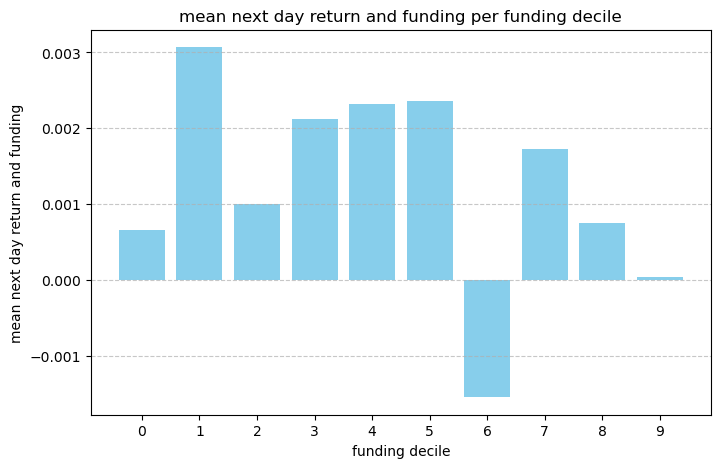

In [10]:
# decile plot to aim to see effects more clearly
decile_means = df.groupby("funding_decile")["next_returns_funding_volscaled"].mean()

plt.figure(figsize=(8,5))
plt.bar(decile_means.index, decile_means.values, color="skyblue")
plt.xlabel("funding decile")
plt.ylabel("mean next day return and funding")
plt.title("mean next day return and funding per funding decile")
plt.xticks(decile_means.index)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()